In [3]:
from deepforest import main
from deepforest import get_data
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch


/Users/iosefa/repos/obia/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [114]:
from PIL import Image
import os

def tile_image(input_image_path, output_dir, tile_size=(350, 350)):
    # Open the image
    image = Image.open(input_image_path)
    image_width, image_height = image.size
    
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Generate tiles
    tile_num = 1
    for top in range(0, image_height, tile_size[1]):
        for left in range(0, image_width, tile_size[0]):
            # Calculate the box for each tile
            box = (left, top, min(left + tile_size[0], image_width), min(top + tile_size[1], image_height))
            tile = image.crop(box)
            
            # Save each tile as a separate file
            tile.save(os.path.join(output_dir, f"tile_{tile_num}.png"))
            tile_num += 1

# Example usage
input_image_path = "/Users/iosefa/repos/hawaii-landcover/puuwaawaa/data/puu_test_1.png"
output_dir = "/Users/iosefa/repos/hawaii-landcover/puuwaawaa/data/tiles"
tile_image(input_image_path, output_dir)

In [115]:
from deepforest import main
from deepforest import get_data
import matplotlib.pyplot as plt

model = main.deepforest()
model.load_model(model_name="weecology/deepforest-tree", revision="main")
m.config['retinanet']["score_thresh"] = 0.05

# m.config['validation']['iou_threshold'] = 0.3
# m.config['validation']['val_accuracy_interval']: 1

Reading config file: /Users/iosefa/repos/obia/venv/lib/python3.12/site-packages/deepforest/data/deepforest_config.yml


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Reading config file: /Users/iosefa/repos/obia/venv/lib/python3.12/site-packages/deepforest/data/deepforest_config.yml


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


/Users/iosefa/repos/hawaii-landcover/puuwaawaa/data/tiles/tile_25.png
(84, 8)
    xmin   ymin   xmax   ymax label     score   image_path  \
0  312.0  279.0  329.0  295.0  Tree  0.450175  tile_25.png   
1  282.0  229.0  304.0  250.0  Tree  0.397354  tile_25.png   
2  243.0  242.0  261.0  260.0  Tree  0.393894  tile_25.png   
3  321.0  254.0  335.0  268.0  Tree  0.388902  tile_25.png   
4  236.0  290.0  263.0  315.0  Tree  0.372903  tile_25.png   

                                            geometry  
0  POLYGON ((329 279, 329 295, 312 295, 312 279, ...  
1  POLYGON ((304 229, 304 250, 282 250, 282 229, ...  
2  POLYGON ((261 242, 261 260, 243 260, 243 242, ...  
3  POLYGON ((335 254, 335 268, 321 268, 321 254, ...  
4  POLYGON ((263 290, 263 315, 236 315, 236 290, ...  


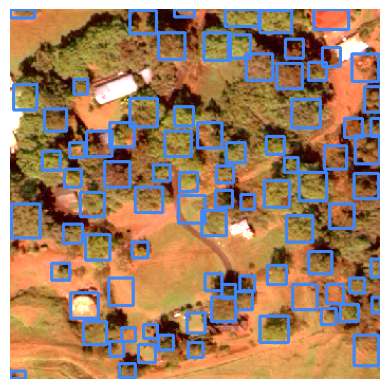

In [118]:
sample_image_path = "/Users/iosefa/repos/hawaii-landcover/puuwaawaa/data/tiles/tile_25.png"
print(sample_image_path)
img = model.predict_image(path=sample_image_path)

print(img.shape)
print(img.head())
visualize.plot_results(img)

In [36]:
from obia.handlers.geotif import open_geotiff

raster_location = "/Users/iosefa/repos/hawaii-landcover/puuwaawaa/data/clipped_region_2_fig3.tif"
raster = open_geotiff(raster_location)
img = raster.to_image([4,2,1], stretch_type="clahe")

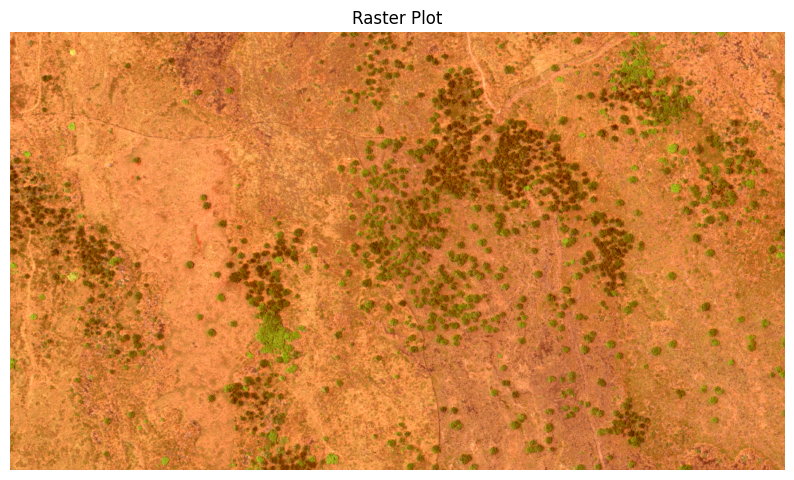

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title('Raster Plot')
plt.axis('off')  # Hide axis
plt.show()

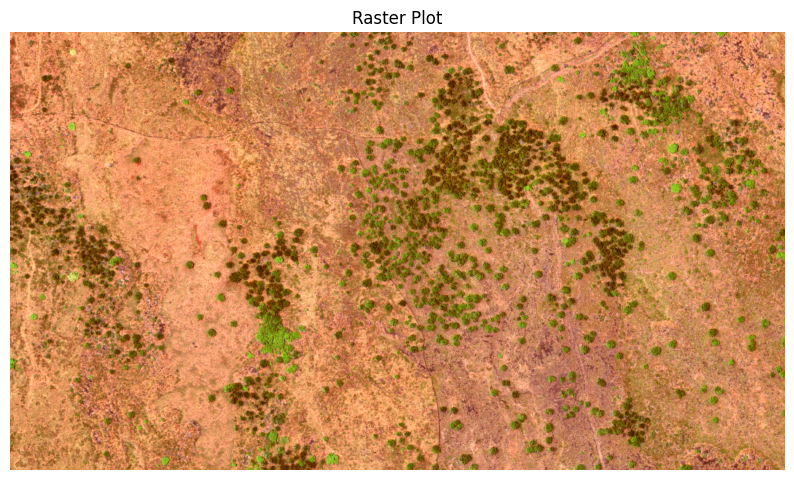

In [24]:
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title('Raster Plot')
plt.axis('off')  # Hide axis
plt.show()

In [30]:
import os
from PIL import Image

output_dir = "/Users/iosefa/repos/hawaii-landcover/puuwaawaa/data/tiles"

os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(output_dir):
    file_path = os.path.join(output_dir, filename)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            os.rmdir(file_path)
    except Exception as e:
        print(f"Failed to delete {file_path}. Reason: {e}")

tile_size = (400, 400)
image_width, image_height = img.size

tile_num = 1
for top in range(0, image_height, tile_size[1]):
    for left in range(0, image_width, tile_size[0]):
        box = (left, top, min(left + tile_size[0], image_width), min(top + tile_size[1], image_height))
        tile = img.crop(box)
        tile.save(os.path.join(output_dir, f"tile_{tile_num}.png"))
        tile_num += 1

Reading config file: /Users/iosefa/repos/obia/venv/lib/python3.12/site-packages/deepforest/data/deepforest_config.yml


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Reading config file: /Users/iosefa/repos/obia/venv/lib/python3.12/site-packages/deepforest/data/deepforest_config.yml


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


(30, 8)
    xmin   ymin   xmax   ymax label     score   image_path  \
0  390.0   51.0  399.0   75.0  Tree  0.510510  tile_15.png   
1  379.0  359.0  400.0  382.0  Tree  0.483510  tile_15.png   
2   71.0  192.0   95.0  211.0  Tree  0.469020  tile_15.png   
3   37.0  389.0   56.0  399.0  Tree  0.466772  tile_15.png   
4  259.0    3.0  287.0   25.0  Tree  0.425904  tile_15.png   

                                            geometry  
0  POLYGON ((399 51, 399 75, 390 75, 390 51, 399 ...  
1  POLYGON ((400 359, 400 382, 379 382, 379 359, ...  
2  POLYGON ((95 192, 95 211, 71 211, 71 192, 95 1...  
3  POLYGON ((56 389, 56 399, 37 399, 37 389, 56 3...  
4    POLYGON ((287 3, 287 25, 259 25, 259 3, 287 3))  


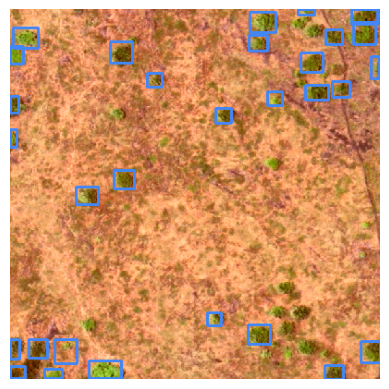

In [32]:
from deepforest import main, visualize

model = main.deepforest()
model.load_model(model_name="weecology/deepforest-tree", revision="main")
model.config['retinanet']["score_thresh"] = 0.02

sample_image_path = "/Users/iosefa/repos/hawaii-landcover/puuwaawaa/data/tiles/tile_15.png"
trees = model.predict_image(path=sample_image_path)

print(trees.shape)
print(trees.head())
visualize.plot_results(trees)


In [38]:
import math
import os
import glob
import time

import numpy as np
import numpy.lib.recfunctions as rfn

import geopandas as gpd
from obia.handlers.geotif import open_geotiff, open_binary_geotiff_as_mask
from obia.segmentation.segment_statistics import create_objects
from obia.segmentation.segment_boundaries import create_segments


start_time = time.time()

input_mask = "/Users/iosefa/repos/hawaii-landcover/puuwaawaa/data/clipped_region_2_mask.tif"

area_threshold = np.pi ** 2

mask, _, _, _= open_binary_geotiff_as_mask(input_mask)
crown_radius = 2.5
pixel_area = 0.5 ** 2
crown_area = math.pi * (crown_radius ** 2)
tree_area = mask.sum() * pixel_area
n_crowns = round(tree_area / crown_area)
n_segments = n_crowns

segments = create_segments(
    raster,
    segmentation_bands=None,
    mask=mask,
    compactness=0.27,
    n_segments=n_segments,
    sigma=0,
    convert2lab=False,
    slic_zero=False
)
segments.to_file('/Users/iosefa/repos/hawaii-landcover/puuwaawaa/data/clipped_region_2_segments.gpkg')

elapsed_time = time.time() - start_time
print(f"Time taken: {elapsed_time:.6f} seconds")

Shape of img_to_segment: (1229, 2175, 9)
Time taken: 159.805424 seconds


In [49]:
import rasterio as rio

with rio.open(raster_location) as src:
    r = src.read([2, 3, 5])
r = r.transpose(1, 2, 0)

# boxes["image_path"] = "/Users/iosefa/repos/hawaii-landcover/puuwaawaa/data/clipped_region_2_fig3.tif"
# gdf = utilities.boxes_to_shapefile(boxes, root_dir="/Users/iosefa/repos/hawaii-landcover/puuwaawaa/data/boxes")
# gdf.to_file("/Users/iosefa/repos/hawaii-landcover/puuwaawaa/data/boxes.gpkg")

In [ ]:
boxes = model.predict_tile(image=r, patch_size=400, patch_overlap=0.2)

In [51]:
from deepforest import main
from deepforest import get_data
import matplotlib.pyplot as plt

# Initialize the model class
model = main.deepforest()

# Load a pretrained tree detection model from Hugging Face
model.load_model(model_name="weecology/deepforest-tree", revision="main")
# Predict on large geospatial tiles using overlapping windows
raster_path = get_data("OSBS_029.tif")
predicted_raster = model.predict_tile(raster_path, patch_size=300, patch_overlap=0.25)
plot_results(results)

Reading config file: /Users/iosefa/repos/obia/venv/lib/python3.12/site-packages/deepforest/data/deepforest_config.yml


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Reading config file: /Users/iosefa/repos/obia/venv/lib/python3.12/site-packages/deepforest/data/deepforest_config.yml


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined